In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df["quality"] = pd.cut(df["quality"], bins=[0, 4, 6, 10], labels=["bad", "medium", "good"])

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,medium,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,medium,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,medium,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium,1595


In [7]:
df["quality"].value_counts()

quality
medium    945
good      159
bad        39
Name: count, dtype: int64

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
df.drop("Id", axis=1, inplace=True)

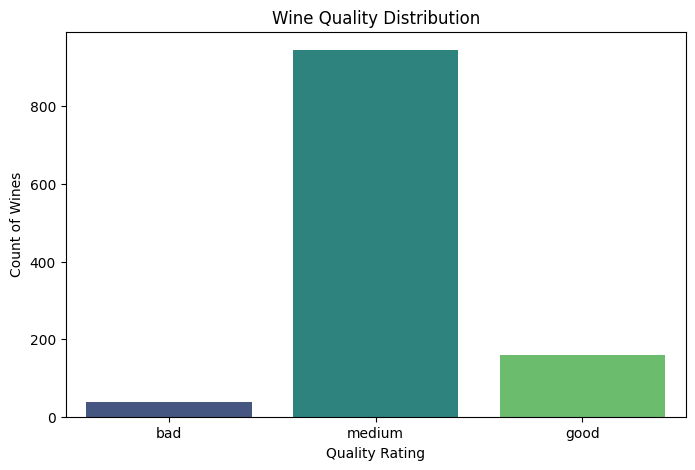

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Rating")
plt.ylabel("Count of Wines")
plt.show()

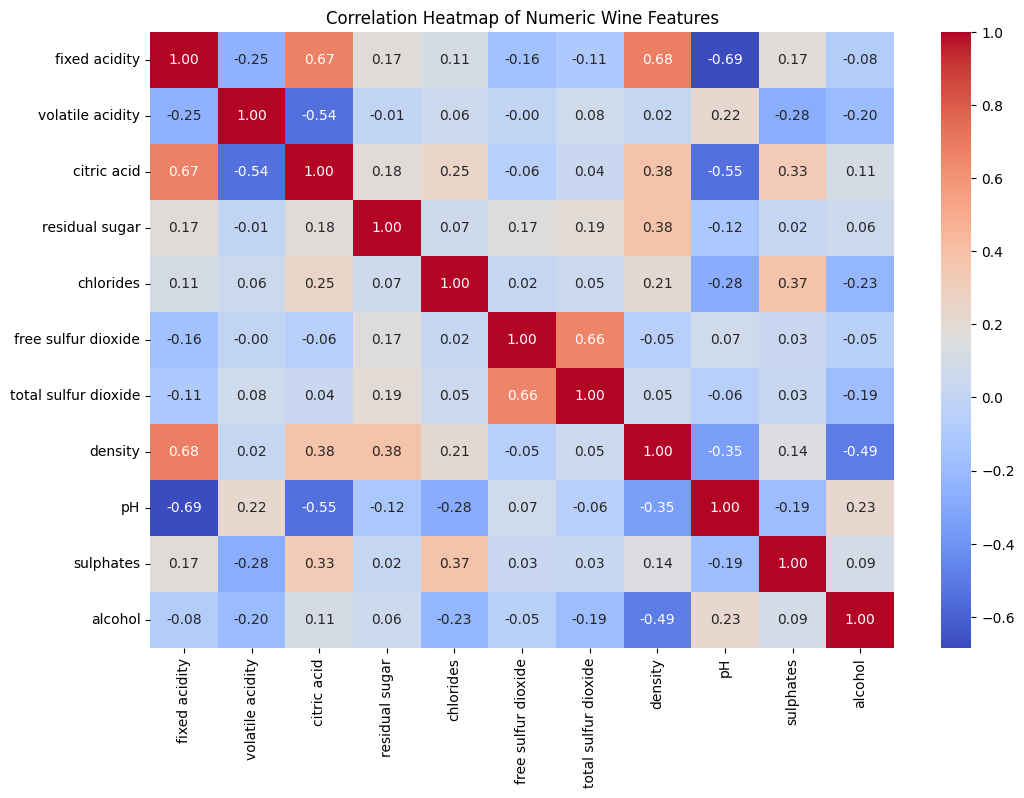

In [11]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Wine Features")
plt.show()

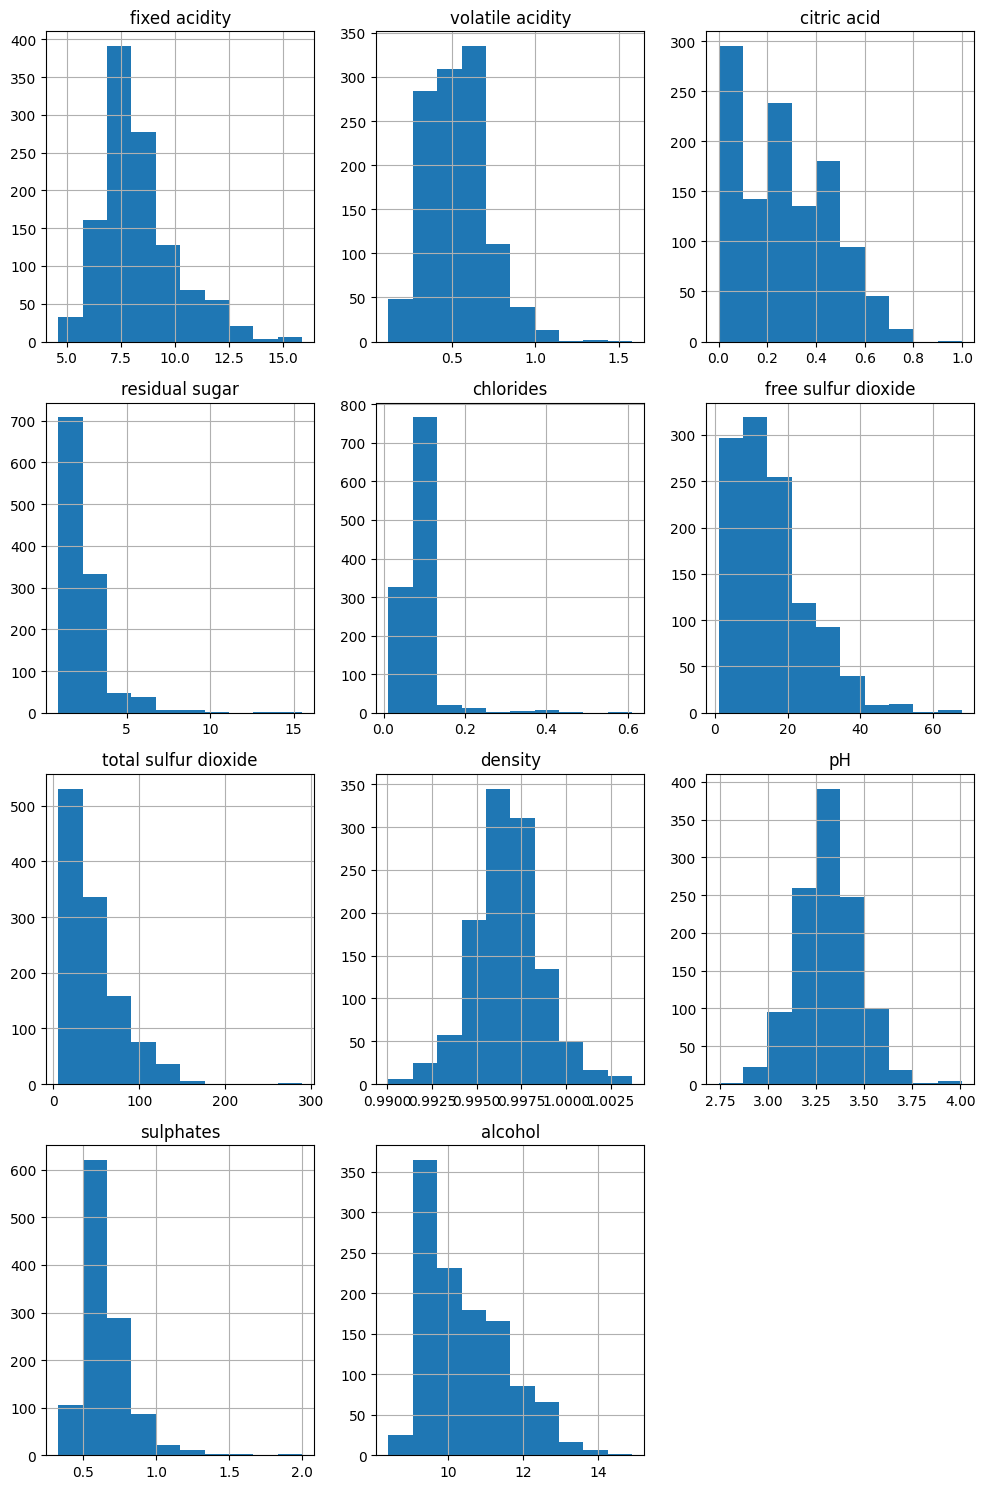

In [12]:
df.hist(bins=10, figsize=(10,15))  
plt.tight_layout()
plt.show()

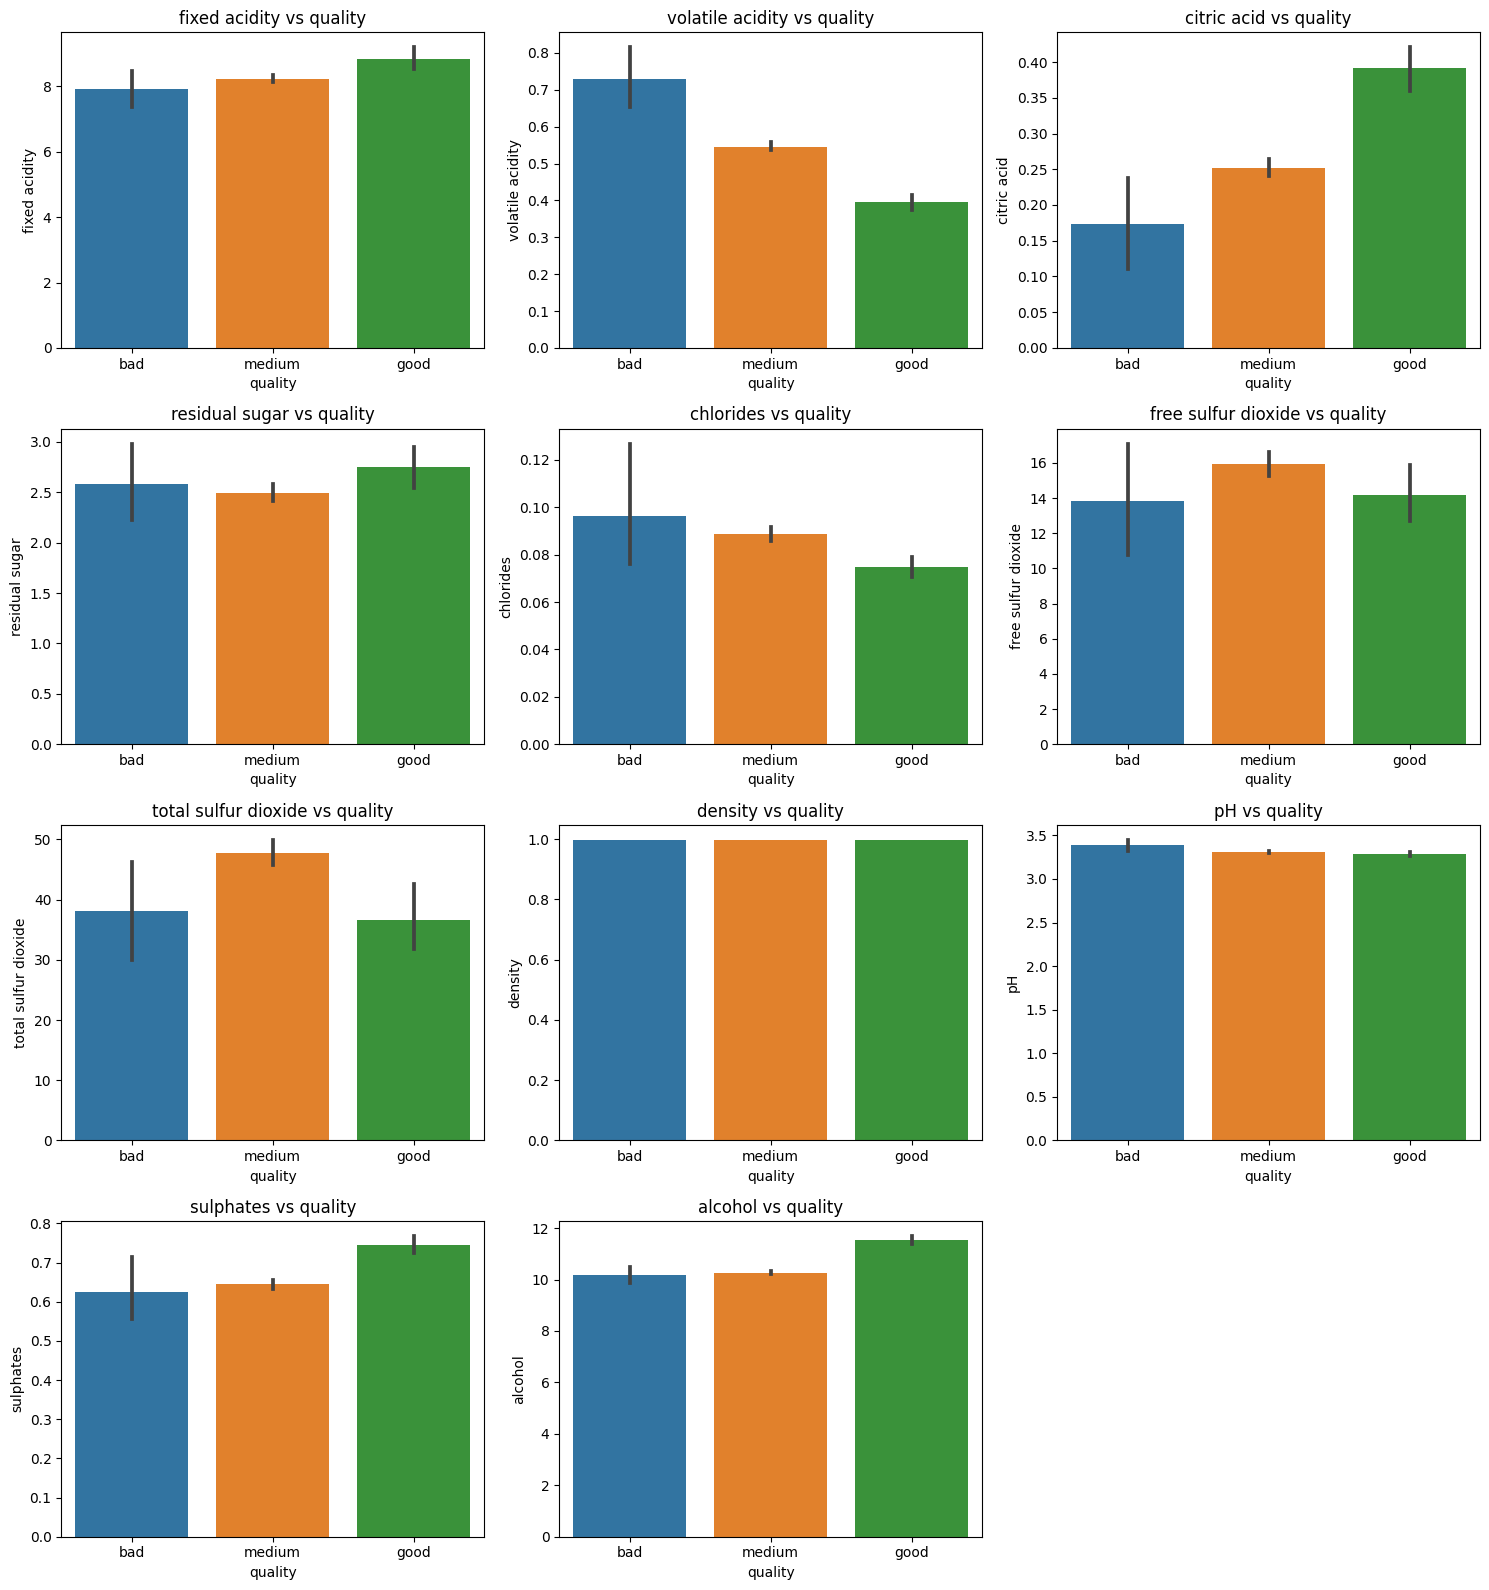

In [13]:
cols = df.columns.drop("quality")
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.barplot(x="quality", y=col, data=df, ax=axes[i], hue=None, dodge=False)
    axes[i].set_title(f"{col} vs quality")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

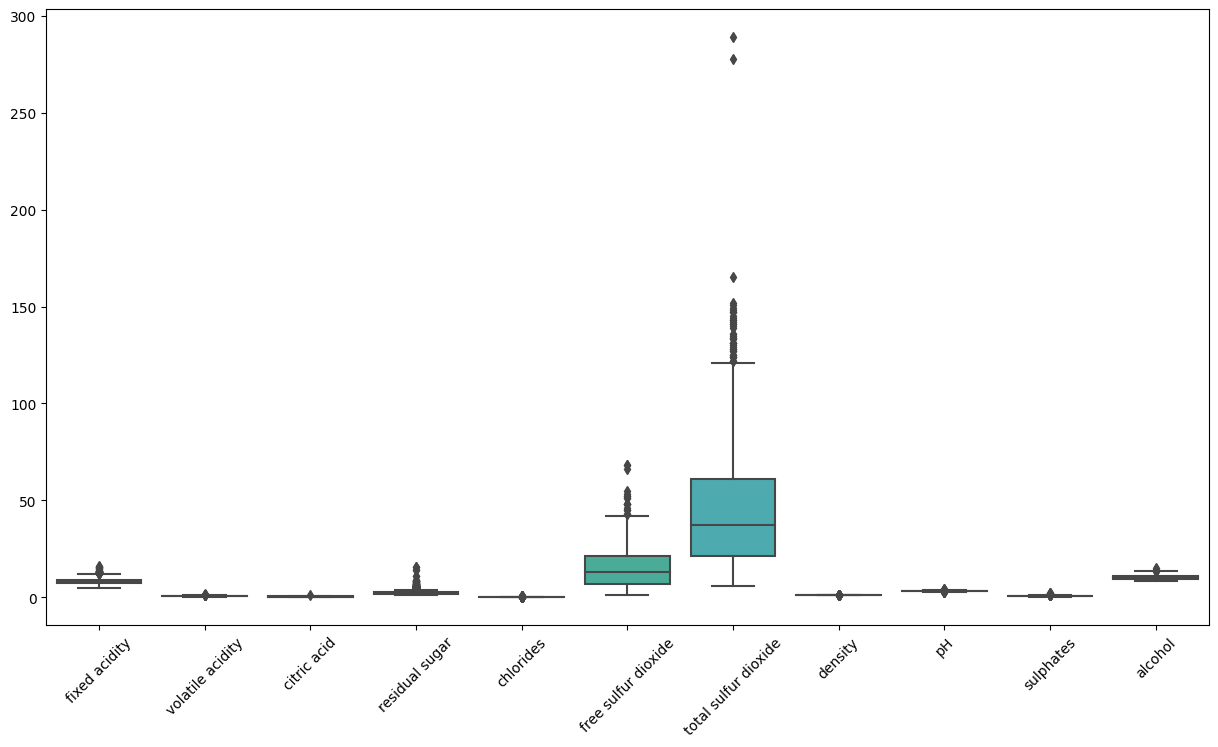

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df) 
plt.xticks(rotation=45)
plt.show()

In [15]:
df_clean = df.copy()

# Loop through numeric columns
for col in df_clean.select_dtypes(include=np.number).columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap outliers instead of removing
    df_clean[col] = np.where(df_clean[col] < lower, lower,
                      np.where(df_clean[col] > upper, upper, df_clean[col]))

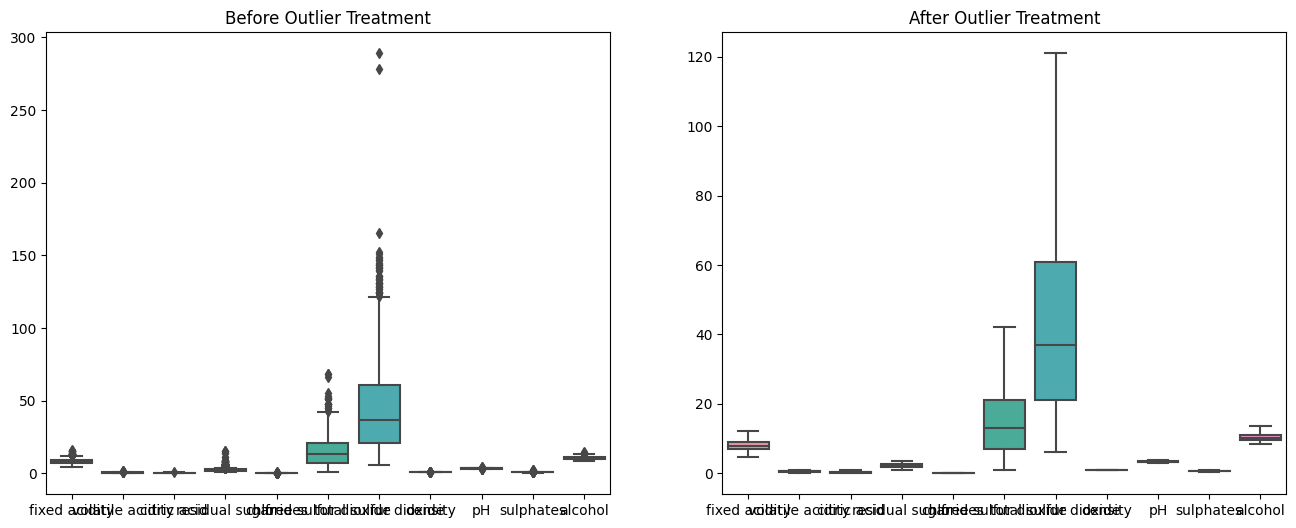

In [16]:

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(data=df)
plt.title("Before Outlier Treatment")
plt.subplot(1,2,2)
sns.boxplot(data=df_clean)
plt.title("After Outlier Treatment")

plt.show()

In [17]:
df_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


In [18]:
df_clean["quality"] = df_clean["quality"].map({"bad": 0, "medium": 1, "good": 2}) #we cann aslo use lable encoding!

In [19]:
df_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [20]:
X = df_clean.drop("quality", axis=1)
y = df_clean["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=14)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

🔹 Random Forest Results
Accuracy: 0.8951965065502183
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.90      0.98      0.94       193
           2       0.80      0.57      0.67        28

    accuracy                           0.90       229
   macro avg       0.57      0.52      0.54       229
weighted avg       0.86      0.90      0.87       229



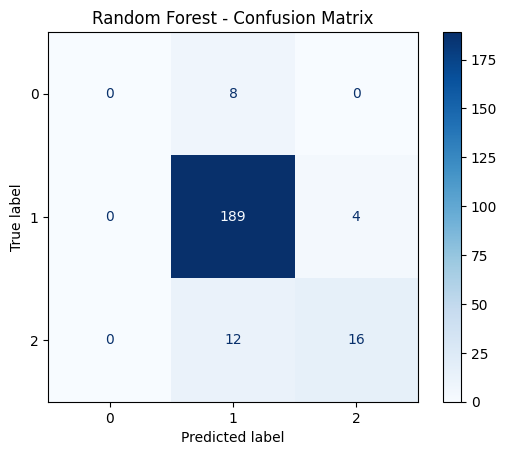

In [22]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
print("🔹 Random Forest Results")
y_pred_rf = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()


🔹 XGBoost Results
Accuracy: 0.8951965065502183
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.91      0.97      0.94       193
           2       0.75      0.64      0.69        28

    accuracy                           0.90       229
   macro avg       0.55      0.54      0.54       229
weighted avg       0.86      0.90      0.88       229



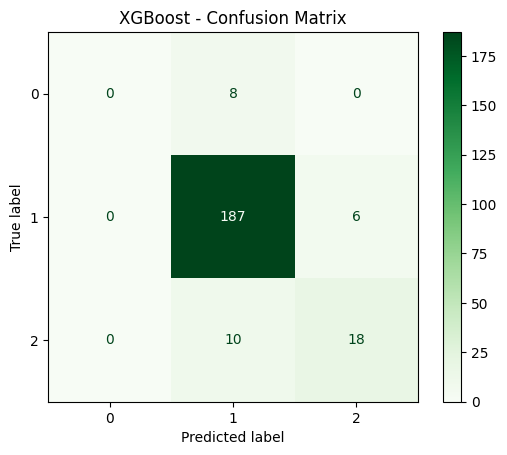

In [25]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
model_xg.fit(X_train, y_train)

print("\n🔹 XGBoost Results")
y_pred_xg = model_xg.predict(X_test)

print("Accuracy:", model_xg.score(X_test, y_test))
print(classification_report(y_test, y_pred_xg))

cm_xg = confusion_matrix(y_test, y_pred_xg)
disp_xg = ConfusionMatrixDisplay(confusion_matrix=cm_xg, display_labels=model_xg.classes_)
disp_xg.plot(cmap="Greens")
plt.title("XGBoost - Confusion Matrix")
plt.show()


🔹 KNN Results
Accuracy: 0.8646288209606987
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.96      0.92       193
           2       0.62      0.46      0.53        28

    accuracy                           0.86       229
   macro avg       0.50      0.47      0.48       229
weighted avg       0.83      0.86      0.84       229



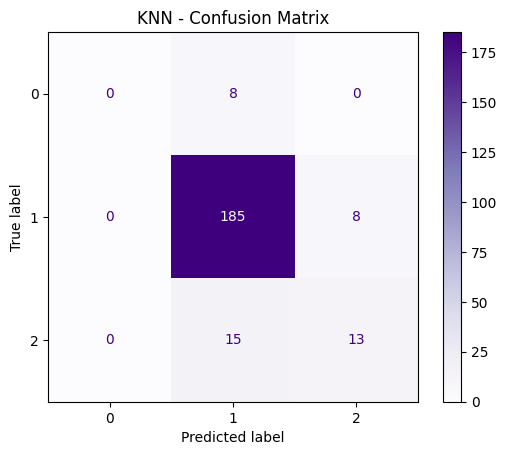

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\n🔹 KNN Results")
print("Accuracy:", knn.score(X_test, y_test))
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=knn.classes_).plot(cmap="Purples")
plt.title("KNN - Confusion Matrix")
plt.show()


🔹 SVC Results
Accuracy: 0.8733624454148472
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.88      0.98      0.93       193
           2       0.77      0.36      0.49        28

    accuracy                           0.87       229
   macro avg       0.55      0.45      0.47       229
weighted avg       0.84      0.87      0.84       229



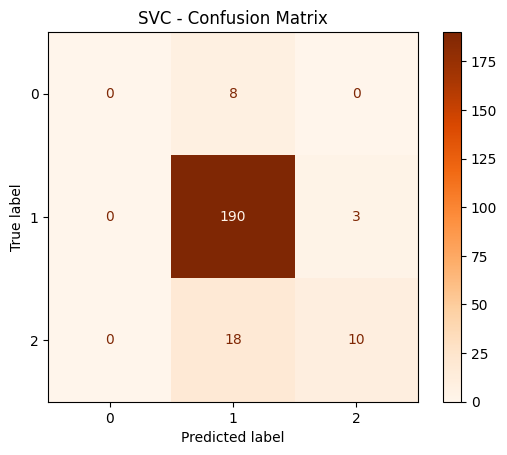

In [27]:
svc = SVC(kernel="rbf", C=1, gamma="scale")
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("\n🔹 SVC Results")
print("Accuracy:", svc.score(X_test, y_test))
print(classification_report(y_test, y_pred_svc))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc), display_labels=svc.classes_).plot(cmap="Oranges")
plt.title("SVC - Confusion Matrix")
plt.show()

              Accuracy  Macro F1
RandomForest  0.895197  0.535655
XGBoost       0.895197  0.544002
KNN           0.864629  0.484435
SVC           0.873362  0.472300


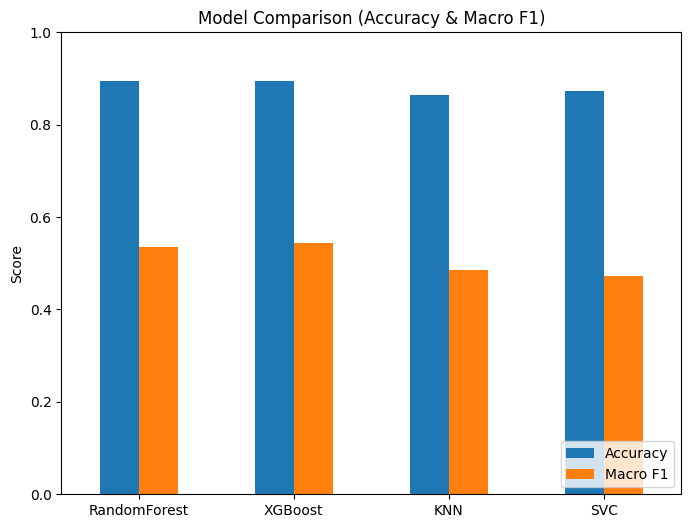

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Store results
results = {}

# --- Random Forest ---
y_pred_rf = model.predict(X_test)
results["RandomForest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Macro F1": f1_score(y_test, y_pred_rf, average="macro")
}

# --- XGBoost ---
y_pred_xg = model_xg.predict(X_test)
results["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_xg),
    "Macro F1": f1_score(y_test, y_pred_xg, average="macro")
}

# --- KNN ---
y_pred_knn = knn.predict(X_test)
results["KNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Macro F1": f1_score(y_test, y_pred_knn, average="macro")
}

# --- SVC ---
y_pred_svc = svc.predict(X_test)
results["SVC"] = {
    "Accuracy": accuracy_score(y_test, y_pred_svc),
    "Macro F1": f1_score(y_test, y_pred_svc, average="macro")
}

# Convert to DataFrame for clean display
results_df = pd.DataFrame(results).T
print(results_df)

# Optional: show nicely as a table
import matplotlib.pyplot as plt

results_df.plot(kind="bar", figsize=(8,6))
plt.title("Model Comparison (Accuracy & Macro F1)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install scikit-learn==1.4.2 imbalanced-learn==0.12.3


In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid = GridSearchCV(
    rf,
    param_grid=rf_params,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train_res, y_train_res)

print("✅ Best RF Params:", rf_grid.best_params_)
print("✅ Best RF CV Score (F1 Macro):", rf_grid.best_score_)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\n📌 Random Forest - Test Results")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, min_samples_lea

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

xgb_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb,
    param_grid=xgb_params,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

xgb_grid.fit(X_train_res, y_train_res)

print("✅ Best XGB Params:", xgb_grid.best_params_)
print("✅ Best XGB CV Score (F1 Macro):", xgb_grid.best_score_)

xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

print("\n📌 XGBoost - Test Results")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END 